In [1]:
import math
import numpy as np
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from scipy.special import expit
from sklearn.model_selection import train_test_split
from numpy.random import default_rng

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import time

from wine_accffaAnn import *



class MultiLayerPerceptron():
    # ================== Activation Functions ================ #

    # accepts a vector or list and returns a list after performing corresponding function on all elements

    @staticmethod
    def sigmoid(vectorSig):
        """returns 1/(1+exp(-x)), where the output values lies between zero and one"""
        sig = expit(vectorSig)
        return sig

    @staticmethod
    def binaryStep(x):
        """ It returns '0' is the input is less then zero otherwise it returns one """
        return np.heaviside(x, 1)

    @staticmethod
    def linear(x):
        """ y = f(x) It returns the input as it is"""
        return x

    @staticmethod
    def tanh(x):
        """ It returns the value (1-exp(-2x))/(1+exp(-2x)) and the value returned will be lies in between -1 to 1"""
        return np.tanh(x)

    @staticmethod
    def relu(x):  # Rectified Linear Unit
        """ It returns zero if the input is less than zero otherwise it returns the given input"""
        x1 = []
        for i in x:
            if i < 0:
                x1.append(0)
            else:
                x1.append(i)

        return x1

    @staticmethod
    def leakyRelu(x):
        """ It returns zero if the input is less than zero otherwise it returns the given input"""
        x1 = []
        for i in x:
            if i < 0:
                x1.append((0.01 * i))
            else:
                x1.append(i)

        return x1

    @staticmethod
    def parametricRelu(self, a, x):
        """ It returns zero if the input is less than zero otherwise it returns the given input"""
        x1 = []
        for i in x:
            if i < 0:
                x1.append((a * i))
            else:
                x1.append(i)

        return x1

    @staticmethod
    def softmax(self, x):
        """ Compute softmax values for each sets of scores in x"""
        return np.exp(x) / np.sum(np.exp(x), axis=0)

    # ============ Activation Functions Part Ends ============= #

    # ================= Distance Calculation ================== #

    @staticmethod
    def chebishev(self, cord1, cord2, exponent_h):
        dist = 0.0
        if ((type(cord1) == int and type(cord2) == int) or ((type(cord1) == float and type(cord2) == float))):
            dist = math.pow((cord1 - cord2), exponent_h)
        else:
            for i, j in zip(cord1, cord2):
                dist += math.pow((i - j), exponent_h)
        dist = math.pow(dist, (1.0 / exponent_h))
        return dist

    @staticmethod
    def minimum_distance(self, cord1, cord2):
        # min(|x1-y1|, |x2-y2|, |x3-y3|, ...)
        dist = float('inf')
        if ((type(cord1) == int and type(cord2) == int) or ((type(cord1) == float and type(cord2) == float))):
            dist = math.fabs(cord1 - cord2)
        else:
            for i, j in zip(cord1, cord2):
                temp_dist = math.fabs(i - j)
                if (temp_dist < dist):
                    dist = temp_dist
        return dist

    @staticmethod
    def maximum_distance(self, cord1, cord2):
        # max(|x1-y1|, |x2-y2|, |x3-y3|, ...)
        dist = float('-inf')
        if ((type(cord1) == int and type(cord2) == int) or ((type(cord1) == float and type(cord2) == float))):
            dist = math.fabs(cord1 - cord2)
        else:
            for i, j in zip(cord1, cord2):
                temp_dist = math.fabs(i - j)
                if (temp_dist > dist):
                    dist = temp_dist
        return dist

    @staticmethod
    def manhattan(self, cord1, cord2):
        # |x1-y1| + |x2-y2| + |x3-y3| + ...
        dist = 0.0
        if ((type(cord1) == int and type(cord2) == int) or ((type(cord1) == float and type(cord2) == float))):
            dist = math.fabs(cord1 - cord2)
        else:
            for i, j in zip(cord1, cord2):
                dist += math.fabs(i - j)
        return dist

    @staticmethod
    def eucledian(self, cord1, cord2):
        dist = 0.0
        if ((type(cord1) == int and type(cord2) == int) or ((type(cord1) == float and type(cord2) == float))):
            dist = math.pow((cord1 - cord2), 2)
        else:
            for i, j in zip(cord1, cord2):
                dist += math.pow((i - j), 2)
        return math.pow(dist, 0.5)

    # =========== Distance Calculation Ends ============== #

    def __init__(self, dimensions=(8, 5), all_weights=(0.1, 0.2), fileName="iris", test = False):

        """
        Args:
            dimensions : dimension of the neural network
            all_weights : the optimal weights we get from the bio-algoANN models
        """

        self.allPop_Weights = []
        self.allPopl_Chromosomes = []
        self.allPop_ReceivedOut = []
        self.allPop_ErrorVal = []

        self.all_weights = all_weights

        self.fitness = []

        # ================== Input dataset and corresponding output ========================= #

        self.fileName = fileName
        self.fileName += ".csv"
        data = pd.read_csv(self.fileName, sep=';')
        data = data.infer_objects()

        output_values_expected = []
        input_values = []

        # ~~~~ encoding ~~~~#

        # labelencoder = LabelEncoder()
        # data[data.columns[-1]] = labelencoder.fit_transform(data[data.columns[-1]])

        # one hot encoding - for multi-column
        # enc = OneHotEncoder(handle_unknown='ignore')
        # combinedData = np.vstack((data[data.columns[-2]], data[data.columns[-1]])).T
        # print(combinedData)
        # y = enc.fit_transform(combinedData).toarray()
        # y = OneHotEncoder().fit_transform(combinedData).toarray()

        #
        y = LabelBinarizer().fit_transform(data[data.columns[-1]])
        # print(y)

        # ~~~~ encoding ends~~~~#

        for j in range(len(data)):
            output_values_expected.append(y[j])

        # print(output_values_expected)

        input_values = []
        for j in range(len(data)):
            b = []
            for i in range(len(data.columns) - 1):
                b.append(data[data.columns[i]][j])
            input_values.append(b)

        self.X = input_values[:]
        self.Y = output_values_expected[:]

        # input and output
        self.X = input_values[:]
        self.Y = output_values_expected[:]
        
        self.test = test
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33)
        if(self.test == True):
            self.X = X_test
            self.Y = Y_test
        else:
            self.X = X_train
            self.Y = Y_train

        self.dimension = dimensions
        # print(self.dimension)

        # ================ Finding Initial Weights ================ #

        self.pop = []  # weights
        reshaped_all_weights = []
        start = 0
        for i in range(len(self.dimension) - 1):
            end = start + self.dimension[i + 1] * self.dimension[i]
            temp_arr = self.all_weights[start:end]
            w = np.reshape(temp_arr[:], (self.dimension[i + 1], self.dimension[i]))
            reshaped_all_weights.append(w)
            start = end
        self.pop.append(reshaped_all_weights)

        self.init_pop = self.all_weights

    # ================ Initial Weights Part Ends ================ #


    def Predict(self, chromo):
        # X, Y and pop are used
        self.fitness = []
        total_error = 0
        m_arr = []
        k1 = 0
        for i in range(len(self.dimension) - 1):
            p = self.dimension[i]
            q = self.dimension[i + 1]
            k2 = k1 + p * q
            m_temp = chromo[k1:k2]
            m_arr.append(np.reshape(m_temp, (p, q)))
            k1 = k2

        y_predicted = []
        for x, y in zip(self.X, self.Y):

            yo = x

            for mCount in range(len(m_arr)):
                yo = np.dot(yo, m_arr[mCount])
                yo = self.sigmoid(yo)
            
            # converting to sklearn acceptable form
            max_yo = max(yo)
            for y_vals in range(len(yo)):
                if(yo[y_vals] == max_yo):
                    yo[y_vals] = 1
                else:
                    yo[y_vals] = 0
            y_predicted.append(yo)
        return (y_predicted, self.Y)

    def main(self):
        Y_PREDICT, Y_ACTUAL = self.Predict(self.init_pop)
        Y_PREDICT = np.array(Y_PREDICT)
        Y_ACTUAL = np.array(Y_ACTUAL)
        
        n_classes = 7
        
        label_binarizer = LabelBinarizer()
        label_binarizer.fit(range(n_classes))
        Y_PREDICT = label_binarizer.inverse_transform(np.array(Y_PREDICT))
        Y_ACTUAL = label_binarizer.inverse_transform(np.array(Y_ACTUAL))
        
        # find error
        if(self.test == True):
            print("\n Actual / Expected", Y_ACTUAL)
            print("\n Predictions", Y_PREDICT)
            print("\n\nConfusion Matrix")
            print(confusion_matrix(Y_ACTUAL, Y_PREDICT))

            print("\n\nClassification Report")
            target_names = []
            for i in range(7):
                k='class '+str(i)
                target_names.append(k)
            print(classification_report(Y_ACTUAL, Y_PREDICT, target_names=target_names))
            print("\n\n\n")
        return accuracy_score(Y_ACTUAL, Y_PREDICT)


Time for inputting data :  0.2642948627471924
============ Calling FFA to get best weights ===============
--------------GENERATION 0-----------
Initial worst fitness =  173025.89881924863 

 Initial best fitness =  34972.049987817154
--------------GENERATION 1-----------
--------------GENERATION 2-----------
--------------GENERATION 3-----------
--------------GENERATION 4-----------
--------------GENERATION 5-----------
--------------GENERATION 6-----------
--------------GENERATION 7-----------
--------------GENERATION 8-----------
--------------GENERATION 9-----------
Fitness :  34972.049987817154
Time taken :  797.5820610523224

 Fitness :  34972.049987817154 
 Best Weights :  [-24, -12, -40, -50, 39, -12, 67, 36, 32, 64, 52, -11, -55, -70, 0, 80, -27, -9, 76, -51, -82, 22, 84, -83, -21, -55, -57, -46, 36, 84, -61, 63, 33, -71, -73, -78, 44, 60, -40, -13, 41, -13, 22, 33, 48, -73, -79, -39, 6, -35, 76, 74, -74, -6, 3, -49, 10, 12, -64, 56, 58, 2, -5, -17, -33, 24, -75, -22, 37, 58, 

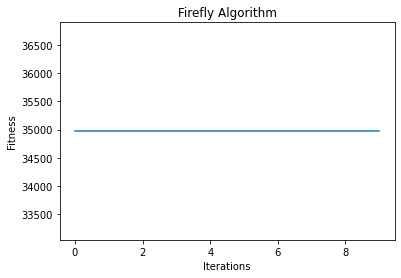

In [2]:
start_time = time.time()
i = InputData(fileName="../ANN/winequality-white")
input_val, output_val = i.main()
end_time = time.time()
print("Time for inputting data : ", end_time - start_time)
        
print("============ Calling FFA to get best weights ===============")

start_time = time.time()
a = ffaAnn(initialPopSize=100, m=10, dimensions = [100,10], input_values=input_val, output_values_expected=output_val, iterations = 10)

fit, b, weights, dim, all_gen_best_weight = a.main()

end_time = time.time()
print("Time taken : ", end_time - start_time)

print("\n Fitness : ", fit, "\n Best Weights : ", weights, "\n Dimensions : ", dim)



import matplotlib.pyplot as plt
x=b[:]
z=[i for i in range(0,10)]
plt.plot(z,x)

plt.title("Firefly Algorithm")
plt.ylabel("Fitness")
plt.xlabel("Iterations")
end_time = time.time()
print("Time Taken : ", end_time - start_time)

In [3]:
print("\n\n============= MLP Program Begins ============")

start_time = time.time()
print("Training")
m = MultiLayerPerceptron(fileName="../ANN/winequality-white", dimensions=dim, all_weights=weights)
m.main()
end_time = time.time()
print("Time taken = ", end_time - start_time)



============= MLP Program Begins ============
Training
Time taken =  0.49268388748168945


In [4]:
start_time = time.time()
print("Testing")
m = MultiLayerPerceptron(fileName="../ANN/winequality-white", dimensions=dim, all_weights=weights, test = True)
m.main()

end_time = time.time()
print("Time taken = ", end_time - start_time)

Testing
Time taken =  0.5116314888000488


0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721


Text(0.5, 0, 'Iterations')

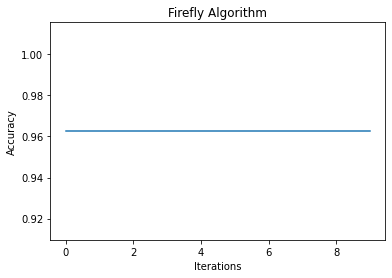

In [5]:
all_accuracy = []
for weights in all_gen_best_weight:
    m = MultiLayerPerceptron(fileName="../ANN/winequality-white", dimensions=dim, all_weights=weights)
    accuracy_val = m.main()
    print(accuracy_val)
    all_accuracy.append(accuracy_val)

import matplotlib.pyplot as plt
x=all_accuracy[:]
z=[i for i in range(len(x))]
plt.plot(z,x)

plt.title("Firefly Algorithm")
plt.ylabel("Accuracy")
plt.xlabel("Iterations")

Time for inputting data :  0.35205578804016113
============ Calling FFA to get best weights ===============
--------------GENERATION 0-----------
Initial worst fitness =  200644.6410310447 

 Initial best fitness =  34307.82335153011
--------------GENERATION 1-----------
--------------GENERATION 2-----------
--------------GENERATION 3-----------
--------------GENERATION 4-----------
--------------GENERATION 5-----------
--------------GENERATION 6-----------
--------------GENERATION 7-----------
--------------GENERATION 8-----------
--------------GENERATION 9-----------
--------------GENERATION 10-----------
--------------GENERATION 11-----------
--------------GENERATION 12-----------
--------------GENERATION 13-----------
--------------GENERATION 14-----------
--------------GENERATION 15-----------
--------------GENERATION 16-----------
--------------GENERATION 17-----------
--------------GENERATION 18-----------
--------------GENERATION 19-----------
--------------GENERATION 20-------

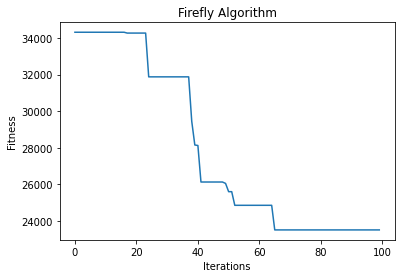

In [6]:
start_time = time.time()
i = InputData(fileName="../ANN/winequality-white")
input_val, output_val = i.main()
end_time = time.time()
print("Time for inputting data : ", end_time - start_time)
        
print("============ Calling FFA to get best weights ===============")

start_time = time.time()
a = ffaAnn(initialPopSize=100, m=10, dimensions = [100,10], input_values=input_val, output_values_expected=output_val, iterations = 100)

fit, b, weights, dim, all_gen_best_weight = a.main()

end_time = time.time()
print("Time taken : ", end_time - start_time)

print("\n Fitness : ", fit, "\n Best Weights : ", weights, "\n Dimensions : ", dim)



import matplotlib.pyplot as plt
x=b[:]
z=[i for i in range(0,100)]
plt.plot(z,x)

plt.title("Firefly Algorithm")
plt.ylabel("Fitness")
plt.xlabel("Iterations")
end_time = time.time()
print("Time Taken : ", end_time - start_time)

In [7]:
print("\n\n============= MLP Program Begins ============")

start_time = time.time()
print("Training")
m = MultiLayerPerceptron(fileName="../ANN/winequality-white", dimensions=dim, all_weights=weights)
m.main()
end_time = time.time()
print("Time taken = ", end_time - start_time)



============= MLP Program Begins ============
Training
Time taken =  0.4777228832244873


In [8]:
start_time = time.time()
print("Testing")
m = MultiLayerPerceptron(fileName="../ANN/winequality-white", dimensions=dim, all_weights=weights, test = True)
m.main()

end_time = time.time()
print("Time taken = ", end_time - start_time)

Testing
Time taken =  0.43782925605773926


0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9101674152715394
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9550837076357697
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113515721
0.9626378113

Text(0.5, 0, 'Iterations')

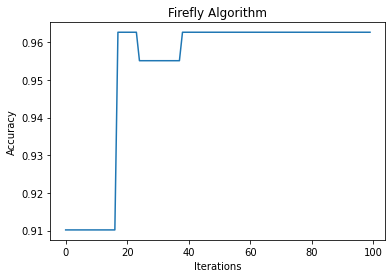

In [9]:
all_accuracy = []
for weights in all_gen_best_weight:
    m = MultiLayerPerceptron(fileName="../ANN/winequality-white", dimensions=dim, all_weights=weights)
    accuracy_val = m.main()
    print(accuracy_val)
    all_accuracy.append(accuracy_val)

import matplotlib.pyplot as plt
x=all_accuracy[:]
z=[i for i in range(len(x))]
plt.plot(z,x)

plt.title("Firefly Algorithm")
plt.ylabel("Accuracy")
plt.xlabel("Iterations")